In [8]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt


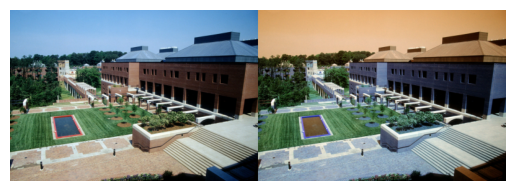

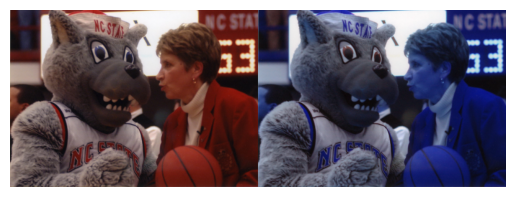

In [17]:
# Membuat list untuk menyimpan URL dari beberapa image
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg"
]

# Baca dan tampilkan image
for url in urls:
    # Baca gambar dari URL
    image = io.imread(url)
    
    # Resize image
    image_resized = cv.resize(image, (0, 0), fx=0.5, fy=0.5)
    
    # Konversi ke RGB
    image_rgb = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)
    
    # Gabungkan gambar asli dan gambar yang dikonversi ke RGB
    final_frame = cv.hconcat([image_resized, image_rgb])

    # Tampilkan gambar menggunakan matplotlib
    plt.imshow(final_frame)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()
    print('\n')


Resolusi image: tinggi x lebar =  286  x  400


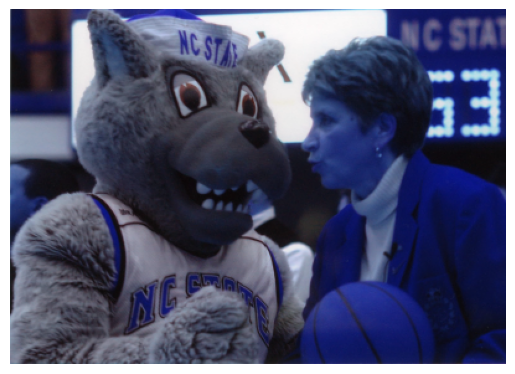

In [18]:
# Resize gambar
image_resized = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

# Konversi ke RGB untuk menampilkan dengan benar di matplotlib
image_2 = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)

# Mendapatkan tinggi dan lebar gambar
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("Resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)

# Tampilkan gambar menggunakan matplotlib
plt.imshow(image_2)
plt.axis('off')  # Hilangkan sumbu
plt.show()
     

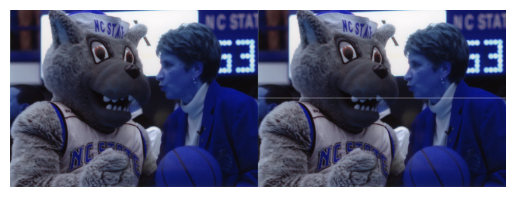

In [19]:
# Konversi gambar ke RGB
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggambar garis putih di tengah gambar
tinggi, lebar = image_3.shape[:2]
for y in range(lebar):
    image_3[int(tinggi / 2), y] = [255, 255, 255]

# Gabungkan gambar secara horizontal
final_frame = cv.hconcat([image_2, image_3])

# Tampilkan hasil menggunakan matplotlib
plt.imshow(final_frame)
plt.axis('off')  # Hilangkan sumbu untuk tampilan yang lebih bersih
plt.show()

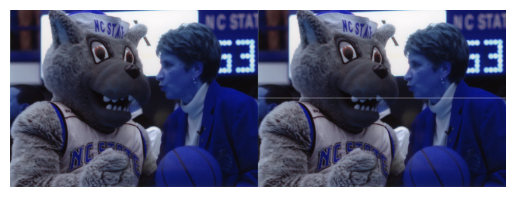

In [20]:
# Menggunakan list comprehension untuk membuat garis horizontal di tengah gambar
def add_horizontal_line_with_list_comprehension(image_2):
    image_3 = image_2.copy()
    image_3[int(tinggi / 2)] = np.array([[255, 255, 255] for _ in range(lebar)])
    
    final_frame = cv.hconcat((image_2, image_3))
    plt.imshow(final_frame)
    plt.axis('off')
    plt.show()

add_horizontal_line_with_list_comprehension(image_2)


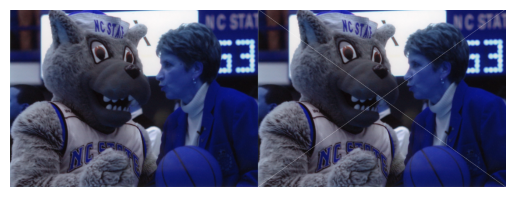

In [21]:
# Menggambar garis diagonal menyilang pada gambar
def add_diagonal_cross(image_2):
    image_3 = image_2.copy()

    # Garis diagonal dari kiri atas ke kanan bawah
    for y in range(tinggi):
        x = int((lebar / tinggi) * y)  # Menentukan koordinat x agar garis tetap diagonal
        image_3[y, x] = [255, 255, 255]

    # Garis diagonal dari kanan atas ke kiri bawah
    for y in range(tinggi):
        x = int((lebar / tinggi) * (tinggi - y - 1))
        image_3[y, x] = [255, 255, 255]

    final_frame = cv.hconcat((image_2, image_3))
    plt.imshow(final_frame)
    plt.axis('off')
    plt.show()

add_diagonal_cross(image_2)


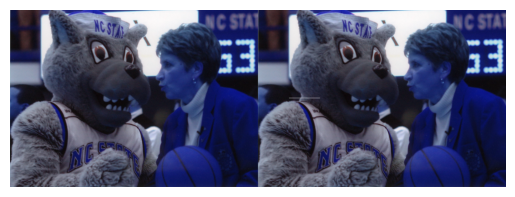

In [22]:
# Membuat garis horizontal secara acak di tengah gambar
def add_random_horizontal_line(image_2):
    image_3 = image_2.copy()

    # Menggambar garis horizontal dari posisi y = 100 hingga 200 di tengah gambar
    for y in range(100, 200):
        image_3[int(tinggi / 2), y] = [255, 255, 255]

    final_frame = cv.hconcat((image_2, image_3))
    plt.imshow(final_frame)
    plt.axis('off')
    plt.show()

add_random_horizontal_line(image_2)


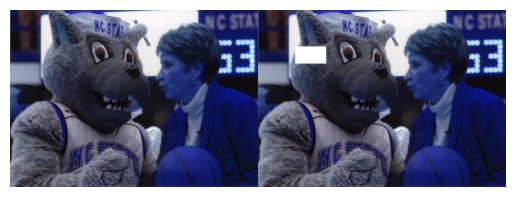

In [23]:
# Membuat pola dengan dua loop yang mengganti warna piksel secara acak pada gambar
def add_random_pattern(image_2):
    image_3 = image_2.copy()

    start = 120
    for y in range(100):  # Menentukan rentang untuk sumbu y
        for c in range(55):  # Menentukan rentang untuk sumbu c
            image_3[start + c, start + y] = [255, 255, 255]  # Mengganti warna piksel dengan putih

    final_frame = cv.hconcat((image_2, image_3))
    plt.imshow(final_frame)
    plt.axis('off')
    plt.show()

add_random_pattern(image_2)


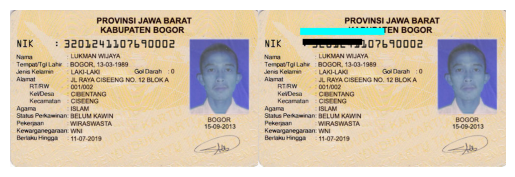

In [24]:
# Menambahkan pola pada gambar KTP
def add_ktp_pattern(image_2):
    image_3 = image_2.copy()

    # Menambahkan garis hitam pada area nama
    bio_allign = 90
    name = 60
    for c in range(12):
        for y in range(120):
            image_3[name + c, bio_allign + y] = [0, 0, 0]

    # Menambahkan garis biru pada area NIK
    nik_allign = 85
    nik = 38
    for c in range(14):
        for y in range(170):
            image_3[nik + c, nik_allign + y] = [0, 255, 255]

    final_frame = cv.hconcat((image_2, image_3))
    plt.imshow(final_frame)
    plt.axis('off')
    plt.show()

# Membaca gambar KTP dan menambah pola
ktp_path = '/content/ktp.jpg'
image = io.imread(ktp_path)
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

add_ktp_pattern(image_2)
